In [1]:
source("./preprocess/utils.R")

parser <- ArgumentParser()

parser$add_argument("--task", type = "character", default = "atlas_tissues_cl")
parser$add_argument("--method", type = "character", default = "midas_embed")
parser$add_argument("--exp", type = "character", default = "c_3")
parser$add_argument("--model", type = "character", default = "default")
parser$add_argument("--init_model", type = "character", default = "")
o <- parser$parse_known_args()[[1]]

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated

In [2]:
# load labels
result_dir <- pj("result", "comparison", o$task, o$method, o$exp, o$model, o$init_model)
pred <- gsub(" cell.*", "", read.csv(pj(result_dir, "label_transferred.csv"), header = F)[, 1])
gt <- gsub(" cell.*", "", read.csv(pj(result_dir, "label_gt.csv"), header = F)[, 1])

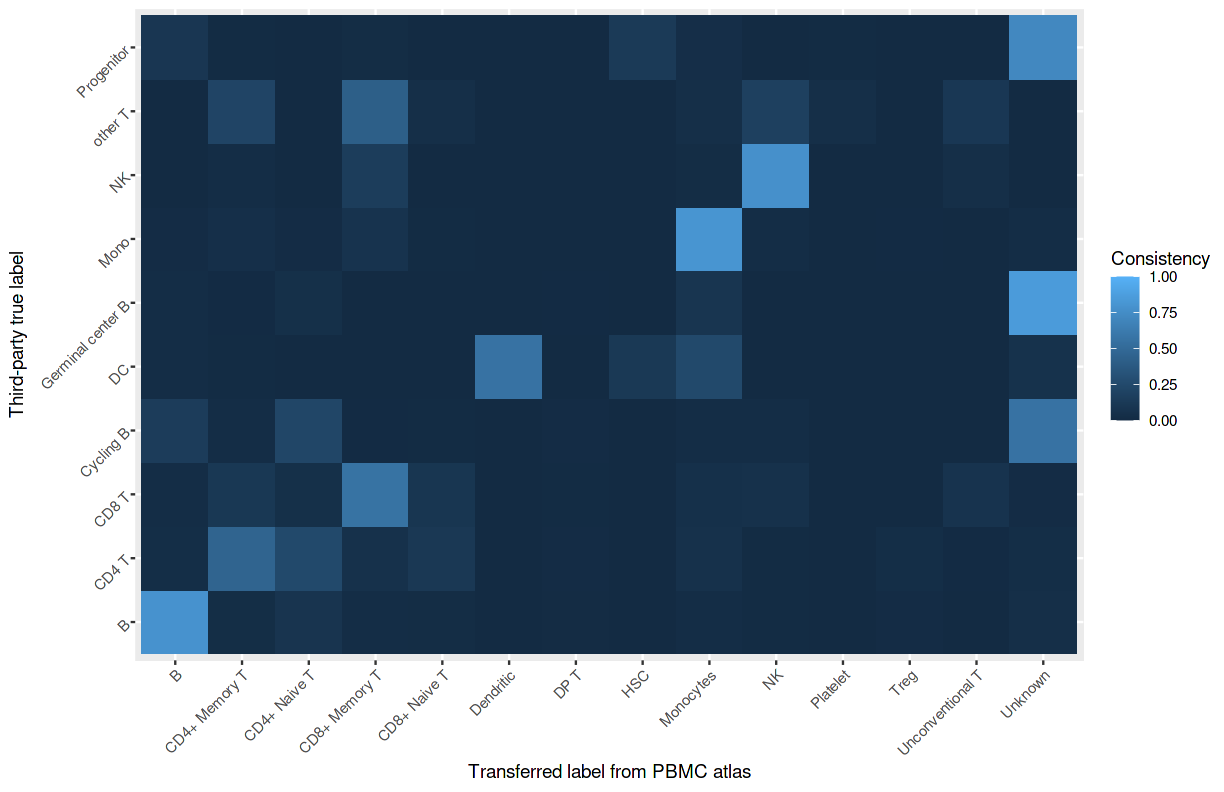

In [4]:
w <- 5.1
h <- 3.3
keep_class <- F
legend <- T
y_lab <- "Third-party true label"
x_lab <- "Transferred label from PBMC atlas"
image_dir <- "./analysis/fig"
# title_name <- rename_task_lt(o$task, o$init_model)

p <- cm_plot(pred, gt, keep_class, legend)  + theme(plot.title = element_text(hjust = 0.5)) +
     ylab(y_lab) + xlab(x_lab)
plt_size(2*w, 2*h)
p   

In [ ]:
mkdir(image_dir, remove_old = F)
ggsave(plot = p, file = pj(image_dir, paste0("confusion_", o$task, "_", o$exp, ".png")), width = 1.5*w, height = 1.5*h, limitsize = F)
ggsave(plot = p, file = pj(image_dir, paste0("confusion_", o$task, "_", o$exp, ".pdf")), width = 1.5*w, height = 1.5*h, limitsize = F)